# Harris Corners

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

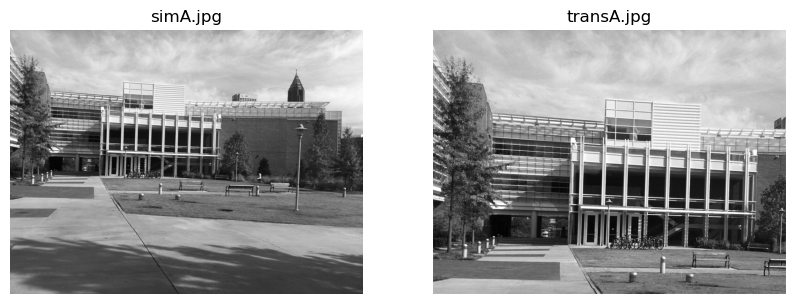

In [2]:
simA = plt.imread('input/simA.jpg')
transA = plt.imread('input/transA.jpg')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(simA, cmap='gray')
plt.title('simA.jpg')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(transA, cmap='gray')
plt.title('transA.jpg')
plt.axis('off')
plt.show()

In [3]:
def x_gradient(img):
    return cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

def y_gradient(img):
    return cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

def x_sobel_blured(img):
    return cv2.Sobel(cv2.GaussianBlur(img, (5, 5), 0), cv2.CV_64F, 1, 0, ksize=3)

def y_sobel_blured(img):
    return cv2.Sobel(cv2.GaussianBlur(img, (5, 5), 0), cv2.CV_64F, 0, 1, ksize=3)

def deal_with_negative(img):
    img = img - np.min(img)
    img = img / np.max(img) * 255
    return img.astype(np.uint8)

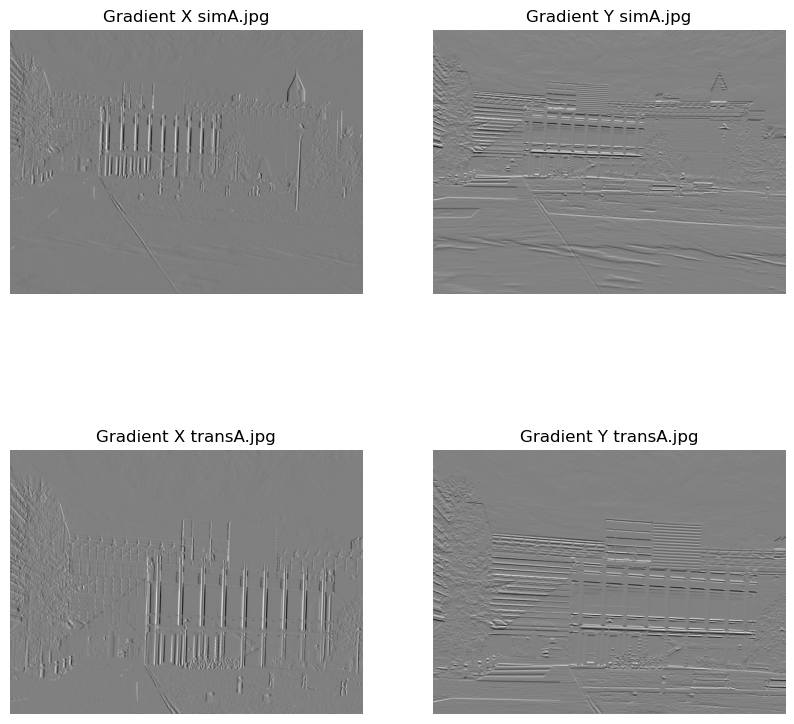

In [4]:
grad_simA_x = deal_with_negative(x_gradient(simA))
grad_simA_y = deal_with_negative(y_gradient(simA))
grad_transA_x = deal_with_negative(x_gradient(transA))
grad_transA_y = deal_with_negative(y_gradient(transA))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(grad_simA_x, cmap='gray')
plt.title('Gradient X simA.jpg')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(grad_simA_y, cmap='gray')
plt.title('Gradient Y simA.jpg')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(grad_transA_x, cmap='gray')
plt.title('Gradient X transA.jpg')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(grad_transA_y, cmap='gray')
plt.title('Gradient Y transA.jpg')
plt.axis('off')
plt.show()

In [5]:
def harris_values(image, window_size=3, window_weight=None, alpha=0.04):
    Ix = x_sobel_blured(image)
    Iy = y_sobel_blured(image)
    Ixx = Ix ** 2
    Iyy = Iy ** 2
    Ixy = Ix * Iy
    height, width = image.shape
    if window_weight is None:
        window_weight = np.ones((window_size, window_size))
    offset = window_size // 2
    harris_values = np.zeros((height, width))
    for i in range(offset, height - offset):
            for j in range(offset, width - offset):
                Sxx = np.sum(Ixx[i - offset:i + offset + 1, j - offset:j + offset + 1] * window_weight)
                Syy = np.sum(Iyy[i - offset:i + offset + 1, j - offset:j + offset + 1] * window_weight)
                Sxy = np.sum(Ixy[i - offset:i + offset + 1, j - offset:j + offset + 1] * window_weight)
                det = Sxx * Syy - Sxy ** 2
                trace = Sxx + Syy
                harris_values[i, j] = det - alpha * trace ** 2
    return harris_values

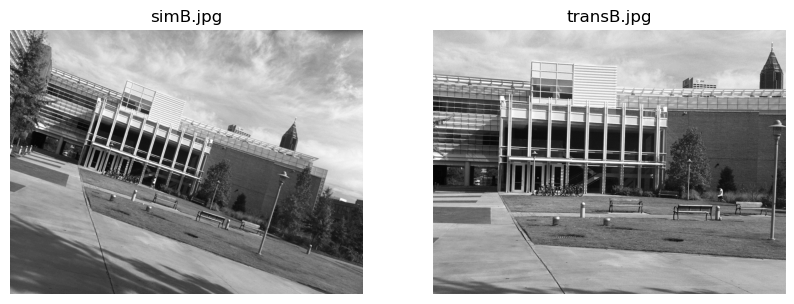

In [6]:
simB = plt.imread('input/simB.jpg')
transB = plt.imread('input/transB.jpg')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(simB, cmap='gray')
plt.title('simB.jpg')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(transB, cmap='gray')
plt.title('transB.jpg')
plt.axis('off')
plt.show()

In [7]:
def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

window_weight = gkern(5, 3)
print(window_weight)

[[0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.03965895 0.04685151 0.04952803 0.04685151 0.03965895]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]]


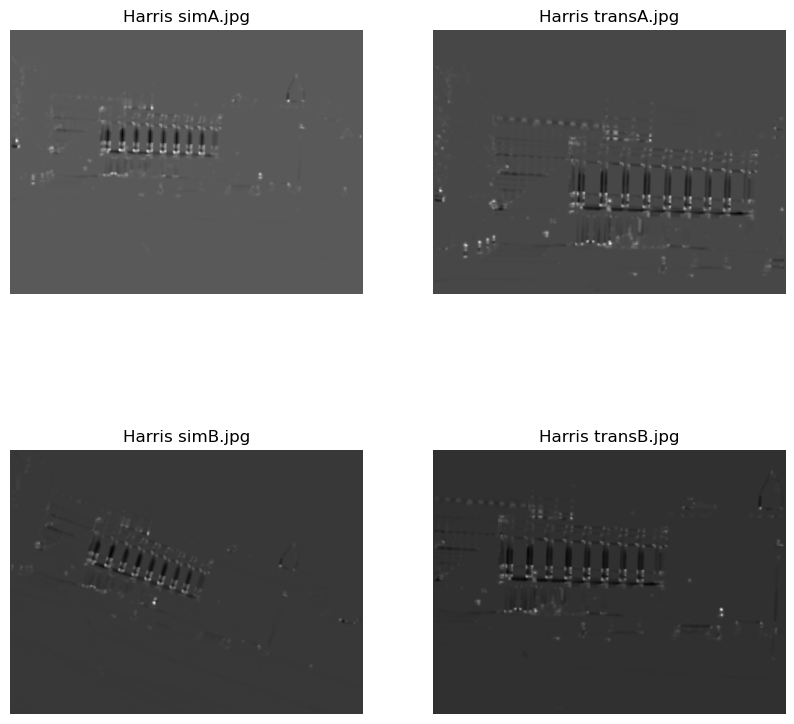

In [8]:
window_weight = gkern(7, 3)
harris_simA = deal_with_negative(harris_values(simA, window_size=7, window_weight=window_weight))
harris_transA = deal_with_negative(harris_values(transA, window_size=7, window_weight=window_weight))
harris_simB = deal_with_negative(harris_values(simB, window_size=7, window_weight=window_weight))
harris_transB = deal_with_negative(harris_values(transB, window_size=7, window_weight=window_weight))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(harris_simA, cmap='gray')
plt.title('Harris simA.jpg')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(harris_transA, cmap='gray')
plt.title('Harris transA.jpg')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(harris_simB, cmap='gray')
plt.title('Harris simB.jpg')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(harris_transB, cmap='gray')
plt.title('Harris transB.jpg')
plt.axis('off')
plt.show()

In [9]:
def thresholding_harris(harris_values, threshold):
    height, width = harris_values.shape
    thresholded_harris = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            if harris_values[i, j] > threshold:
                thresholded_harris[i, j] = 255
    return thresholded_harris.astype(np.uint8)

def non_maximum_suppression(harris_values, window_size=3):
    height, width = harris_values.shape
    offset = window_size // 2
    suppressed_harris = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(offset, height - offset):
        for j in range(offset, width - offset):
            window = harris_values[i - offset:i + offset + 1, j - offset:j + offset + 1]
            window_suppressed = suppressed_harris[i - offset:i + offset + 1, j - offset:j + offset + 1]
            max_value = np.max(window)
            max_value_suppressed = np.max(window_suppressed)
            
            # Check if the center pixel is the maximum and also greater than zero
            if harris_values[i, j] == max_value and max_value_suppressed == 0:
                suppressed_harris[i, j] = harris_values[i, j]
    
    return suppressed_harris


Threshold value: 100
Number of corners in simA.jpg: 5714
Number of corners in transA.jpg: 3528


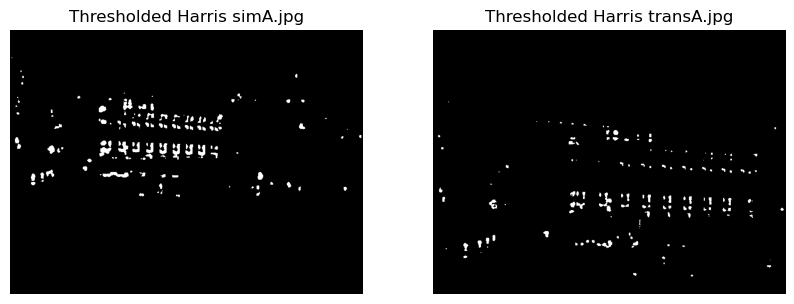

In [10]:
threshold_value = 100
thresholded_harris_simA = thresholding_harris(harris_simA, threshold_value)
thresholded_harris_transA = thresholding_harris(harris_transA, threshold_value)
thresholded_harris_simB = thresholding_harris(harris_simB, threshold_value)
thresholded_harris_transB = thresholding_harris(harris_transB, threshold_value)

print('Threshold value:', threshold_value)
print('Number of corners in simA.jpg:', np.sum(thresholded_harris_simA) // 255)
print('Number of corners in transA.jpg:', np.sum(thresholded_harris_transA) // 255)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(thresholded_harris_simA, cmap='gray')
plt.title('Thresholded Harris simA.jpg')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(thresholded_harris_transA, cmap='gray')
plt.title('Thresholded Harris transA.jpg')
plt.axis('off')
plt.show()

Window size: 15
Number of corners in simA.jpg: 208
Number of corners in transA.jpg: 168


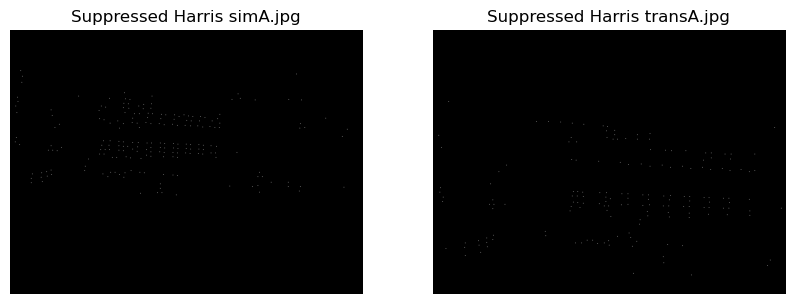

In [11]:
window_size = 15
suppressed_harris_simA = non_maximum_suppression(thresholded_harris_simA, window_size)
suppressed_harris_transA = non_maximum_suppression(thresholded_harris_transA, window_size)
suppressed_harris_simB = non_maximum_suppression(thresholded_harris_simB, window_size)
suppressed_harris_transB = non_maximum_suppression(thresholded_harris_transB, window_size)

print('Window size:', window_size)
print('Number of corners in simA.jpg:', np.sum(suppressed_harris_simA) // 255)
print('Number of corners in transA.jpg:', np.sum(suppressed_harris_transA) // 255)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(suppressed_harris_simA, cmap='gray')
plt.title('Suppressed Harris simA.jpg')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(suppressed_harris_transA, cmap='gray')
plt.title('Suppressed Harris transA.jpg')
plt.axis('off')
plt.show()

In [12]:
# plot corners on the images:
def plot_corners(image, corners):
    image = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2RGB)
    for corner in corners:
        cv2.circle(image, (corner[1], corner[0]), 3, (255, 0, 0), -1)
    return image

def get_corners(harris_values, window_size=3, threshold=100):
    thresholded_harris = thresholding_harris(harris_values, threshold)
    suppressed_harris = non_maximum_suppression(thresholded_harris, window_size)
    corners = np.argwhere(suppressed_harris == 255)
    return corners

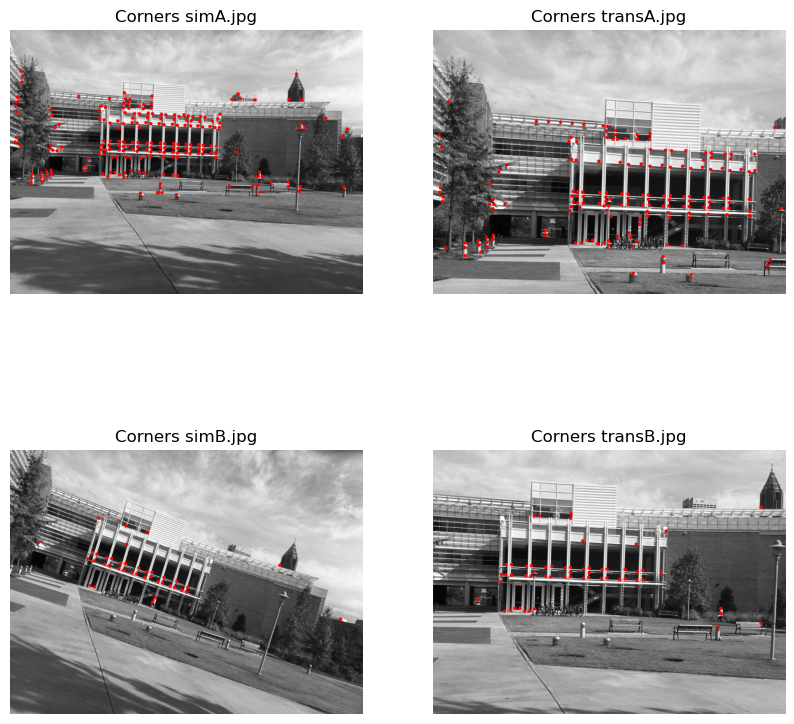

In [13]:
corners_simA = get_corners(harris_simA, window_size=15, threshold=100)
corners_transA = get_corners(harris_transA, window_size=15, threshold=100)
corners_simB = get_corners(harris_simB, window_size=15, threshold=100)
corners_transB = get_corners(harris_transB, window_size=15, threshold=100)

image_simA = plot_corners(simA, corners_simA)
image_transA = plot_corners(transA, corners_transA)
image_simB = plot_corners(simB, corners_simB)
image_transB = plot_corners(transB, corners_transB)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(image_simA)
plt.title('Corners simA.jpg')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(image_transA)
plt.title('Corners transA.jpg')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(image_simB)
plt.title('Corners simB.jpg')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(image_transB)
plt.title('Corners transB.jpg')
plt.axis('off')
plt.show()

In [14]:
def compute_angle(Ix: np.ndarray, Iy: np.ndarray):
    """ Compute the angle of the gradient """
    return np.arctan2(Iy, Ix)

In [15]:
def plot_keypoints_with_orientation(image, keypoints, angles):
    """ Plot keypoints on image with gradient angels as vector of orientation """
    image = image.copy()
    for point in range(len(keypoints)):
        x, y = keypoints[point]
        angle = angles[point]
        cv2.circle(image, (y, x), 3, (255, 0, 0), -1)
        x1 = int(x + 10 * np.cos(angle))
        y1 = int(y + 10 * np.sin(angle))
        cv2.line(image, (y, x), (y1, x1), (0, 255, 0), 1)
    return image

In [16]:
def compute_and_plot_for_all_images(images, keypoints_list):
    """ Compute and plot the keypoints and orientation for all images """
    for i in range(len(images)):
        Ix = x_sobel_blured(images[i])
        Iy = y_sobel_blured(images[i])
        angles = compute_angle(Ix, Iy)[keypoints_list[i][:, 0], keypoints_list[i][:, 1]]
        image = plot_keypoints_with_orientation(images[i], keypoints_list[i], angles)
        plt.figure(figsize=(7, 5))
        plt.imshow(image, cmap='gray')
        plt.title(f'Image {i + 1}')
        plt.axis('off')
        plt.show()

In [17]:
def draw_with_opencv(image, keypoints):
    """ Draw keypoints using cv2.drawKeypoints """
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB).copy()
    keypoints = [cv2.KeyPoint(int(keypoint[1]), int(keypoint[0]), 1) for keypoint in keypoints]
    return cv2.drawKeypoints(image, keypoints, None, color=(255, 0, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)


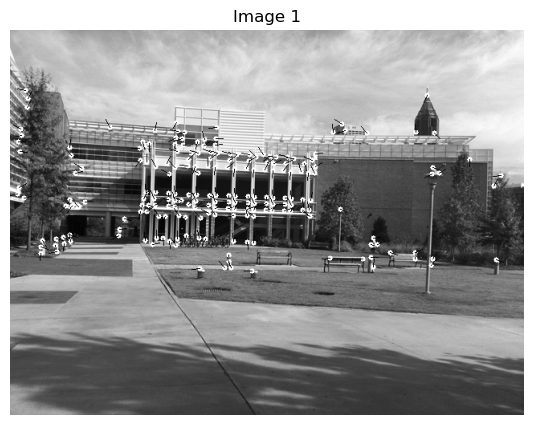

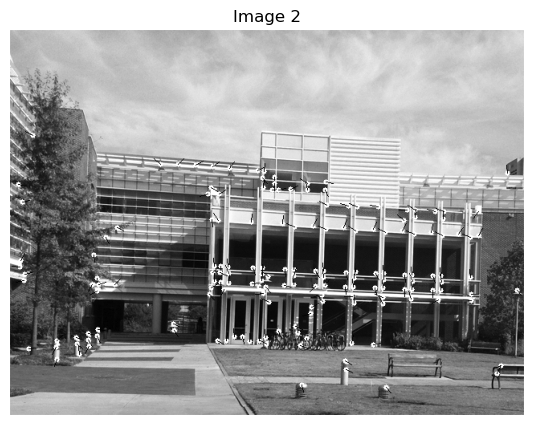

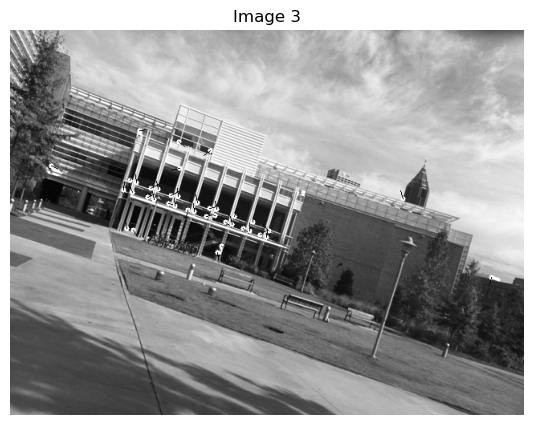

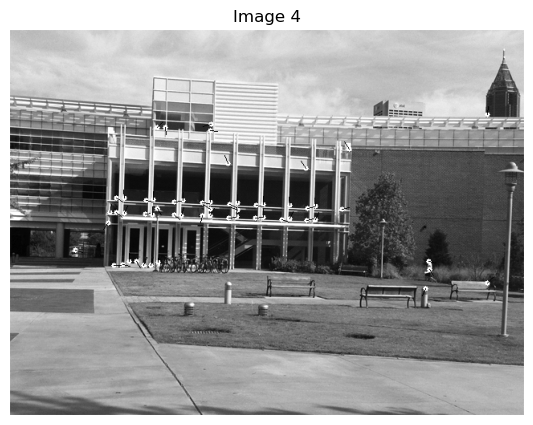

In [18]:
images = [simA, transA, simB, transB]
keypoints_list = [corners_simA, corners_transA, corners_simB, corners_transB]

compute_and_plot_for_all_images(images, keypoints_list)

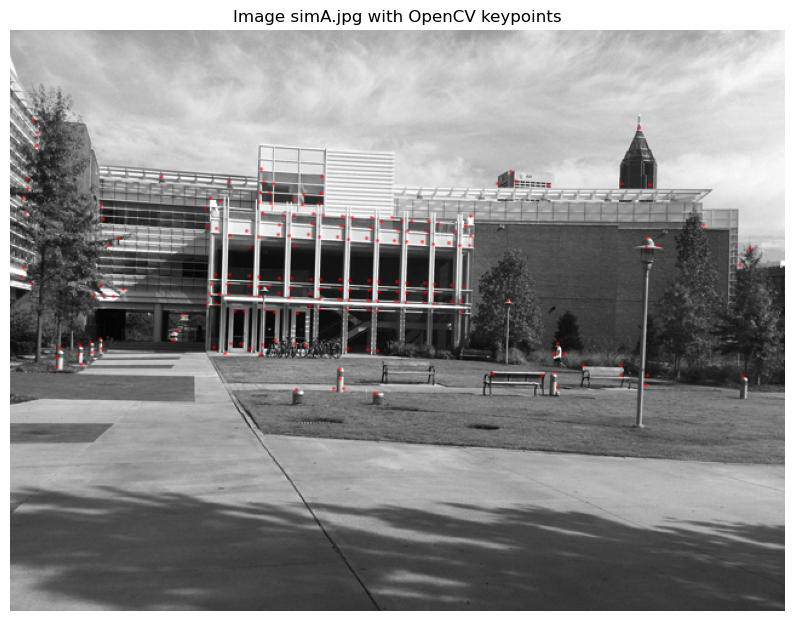

In [19]:
image_simA_opencv = draw_with_opencv(simA, corners_simA)
plt.figure(figsize=(10, 10))
plt.imshow(image_simA_opencv)
plt.title('Image simA.jpg with OpenCV keypoints')
plt.axis('off')
plt.show()

In [20]:
def extract_sift_descriptors(image, keypoints, scale=1.0):
    """
    This function extracts SIFT descriptors for the given keypoints.
    
    - Inputs: 
        - image: The input grayscale image.
        - keypoints: List of keypoints with location, scale, and orientation.
        - scale: The scale at which to compute the descriptors (default is 1.0).
    
    - Output:
        - keypoints: Updated keypoints with scale and orientation information.
        - descriptors: The SIFT descriptors for each keypoint.
    """
    # Create SIFT object in OpenCV
    sift = cv2.SIFT_create()

    # Pass in the keypoints and image to extract descriptors
    keypoints, descriptors = sift.compute(image, keypoints)

    return keypoints, descriptors

In [21]:
def match_descriptors(descriptors1, descriptors2):
    """
    This function matches SIFT descriptors between two images using a brute force matcher.
    
    - Inputs: 
        - descriptors1: Descriptors from image A.
        - descriptors2: Descriptors from image B.
    
    - Output:
        - matches: List of matches found between the descriptors of image A and image B.
    """
    # Create a brute force matcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches by distance (lower distance is better)
    matches = sorted(matches, key=lambda x: x.distance)

    return matches

In [22]:
def draw_putative_matches(imageA, imageB, keypointsA, keypointsB, matches):
    """
    This function creates a new image that adjoins image A and image B, and draws lines
    connecting matched keypoints from image A to image B.
    
    - Inputs:
        - imageA: The first image (left image).
        - imageB: The second image (right image).
        - keypointsA: Keypoints from image A.
        - keypointsB: Keypoints from image B.
        - matches: List of matches between the descriptors of image A and image B.
    
    - Output:
        - matched_image: Image with matched keypoints and lines drawn.
    """
    
    # Compute the dimensions of the new image
    height = max(imageA.shape[0], imageB.shape[0])
    width = imageA.shape[1] + imageB.shape[1]
    
    # Create a new image by concatenating image A and image B
    matched_image = np.zeros((height, width, 3), dtype=np.uint8)
    matched_image[:imageA.shape[0], :imageA.shape[1]] = cv2.cvtColor(imageA, cv2.COLOR_GRAY2RGB)
    matched_image[:imageB.shape[0], imageA.shape[1]:] = cv2.cvtColor(imageB, cv2.COLOR_GRAY2RGB)
    
    # Draw lines connecting matched keypoints
    for match in matches:
        pointA = tuple(map(int, keypointsA[match.queryIdx].pt))
        pointB = tuple(map(int, keypointsB[match.trainIdx].pt))
        
        # Adjust pointB since it's in the second image (shift by width of imageA)
        pointB_shifted = (pointB[0] + imageA.shape[1], pointB[1])

        # Draw a line connecting the points
        cv2.line(matched_image, pointA, pointB_shifted, (0, 255, 0), 1)
    
    return matched_image

In [23]:
def process_and_match_images(imageA, imageB, keypointsA, keypointsB):
    """
    This function extracts SIFT descriptors for both images, matches them, and 
    creates a putative-pair image with matched keypoints.
    
    - Inputs:
        - imageA: The first image (left image).
        - imageB: The second image (right image).
        - keypointsA: Keypoints from image A.
        - keypointsB: Keypoints from image B.
    
    - Output:
        - putative_pair_image: Image with matched keypoints and lines.
    """
    # Step 1: Extract SIFT descriptors for both sets of keypoints
    _, descriptorsA = extract_sift_descriptors(imageA, keypointsA)
    _, descriptorsB = extract_sift_descriptors(imageB, keypointsB)

    # Step 2: Match the descriptors between image A and image B
    matches = match_descriptors(descriptorsA, descriptorsB)

    # Step 3: Draw putative matches between image A and image B
    putative_pair_image = draw_putative_matches(imageA, imageB, keypointsA, keypointsB, matches)

    return putative_pair_image

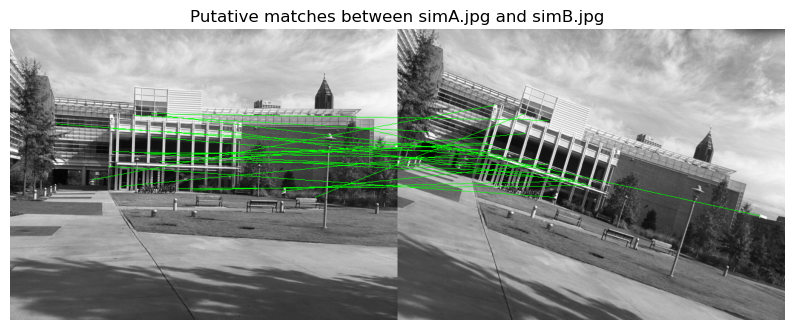

In [24]:
imageA = simA
imageB = simB
keypointsA = [cv2.KeyPoint(int(keypoint[1]), int(keypoint[0]), 1) for keypoint in corners_simA]
keypointsB = [cv2.KeyPoint(int(keypoint[1]), int(keypoint[0]), 1) for keypoint in corners_simB]

putative_pair_image = process_and_match_images(imageA, imageB, keypointsA, keypointsB)

plt.figure(figsize=(10, 10))
plt.imshow(putative_pair_image)
plt.title('Putative matches between simA.jpg and simB.jpg')
plt.axis('off')
plt.show()


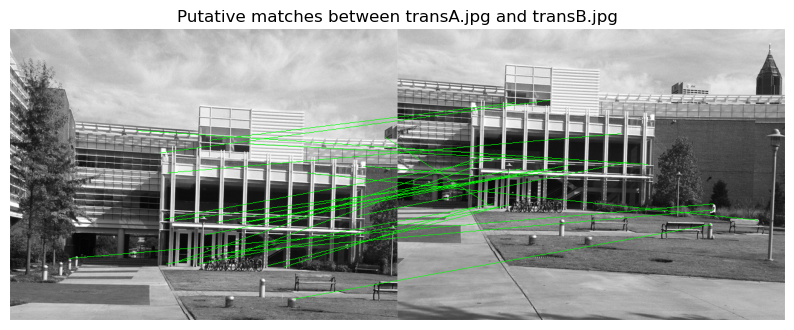

In [25]:
imageA = transA
imageB = transB
keypointsA = [cv2.KeyPoint(int(keypoint[1]), int(keypoint[0]), 1) for keypoint in corners_transA]
keypointsB = [cv2.KeyPoint(int(keypoint[1]), int(keypoint[0]), 1) for keypoint in corners_transB]

putative_pair_image = process_and_match_images(imageA, imageB, keypointsA, keypointsB)

plt.figure(figsize=(10, 10))
plt.imshow(putative_pair_image)
plt.title('Putative matches between transA.jpg and transB.jpg')
plt.axis('off')
plt.show()

In [26]:
def select_random_match(matches, keypointsA, keypointsB):
    """
    Randomly selects one of the putative matches and calculates the translation offset.
    
    - Inputs:
        - matches: List of putative matches.
        - keypointsA: Keypoints from image A.
        - keypointsB: Keypoints from image B.
    
    - Output:
        - offset_x: X translation between the matched keypoints.
        - offset_y: Y translation between the matched keypoints.
        - selected_match: The randomly selected match.
    """
    # Randomly select a match
    selected_match = np.random.choice(matches)
    offset_x = keypointsB[selected_match.trainIdx].pt[0] - keypointsA[selected_match.queryIdx].pt[0]
    offset_y = keypointsB[selected_match.trainIdx].pt[1] - keypointsA[selected_match.queryIdx].pt[1]
    return offset_x, offset_y, selected_match

In [27]:
def find_consensus_set(matches, keypointsA, keypointsB, offset_x, offset_y, tolerance=5):
    """
    Finds the consensus set for the given translation offset.
    
    - Inputs:
        - matches: List of putative matches.
        - keypointsA: Keypoints from image A.
        - keypointsB: Keypoints from image B.
        - offset_x: X translation between the matched keypoints.
        - offset_y: Y translation between the matched keypoints.
        - tolerance: The allowable pixel difference to consider as agreement (default is 5).
    
    - Output:
        - consensus_set: List of matches that agree with the given translation offset.
    """
    consensus_set = []
    for match in matches:
        xA, yA = keypointsA[match.queryIdx].pt
        xB, yB = keypointsB[match.trainIdx].pt
        if np.abs(xB - xA - offset_x) <= tolerance and np.abs(yB - yA - offset_y) <= tolerance:
            consensus_set.append(match)
    return consensus_set

In [28]:
def find_best_translation(matches, keypointsA, keypointsB, iterations=100, tolerance=5):
    """
    Finds the best translation offset that has the largest consensus set.
    
    - Inputs:
        - matches: List of putative matches.
        - keypointsA: Keypoints from image A.
        - keypointsB: Keypoints from image B.
        - iterations: Number of random trials to run (default is 100).
        - tolerance: The allowable pixel difference to consider as agreement (default is 5).
    
    - Output:
        - best_offset_x: The X translation of the best consensus set.
        - best_offset_y: The Y translation of the best consensus set.
        - best_consensus_set: The matches that form the largest consensus set.
    """
    best_offset_x, best_offset_y = 0, 0
    best_consensus_set = []
    for _ in range(iterations):
        offset_x, offset_y, selected_match = select_random_match(matches, keypointsA, keypointsB)
        consensus_set = find_consensus_set(matches, keypointsA, keypointsB, offset_x, offset_y, tolerance)
        if len(consensus_set) > len(best_consensus_set):
            best_offset_x, best_offset_y = offset_x, offset_y
            best_consensus_set = consensus_set
    return best_offset_x, best_offset_y, best_consensus_set

In [30]:
def draw_consensus_lines(imageA, imageB, keypointsA, keypointsB, consensus_set):
    """
    This function creates an adjoined image of image A and image B, and draws lines 
    connecting the keypoints in the largest consensus set.
    
    - Inputs:
        - imageA: The first image (left image).
        - imageB: The second image (right image).
        - keypointsA: Keypoints from image A.
        - keypointsB: Keypoints from image B.
        - consensus_set: The list of matches in the largest consensus set.
    
    - Output:
        - consensus_image: Image with matched keypoints and lines drawn for the consensus set.
    """
    # Compute the dimensions of the new image
    height = max(imageA.shape[0], imageB.shape[0])
    width = imageA.shape[1] + imageB.shape[1]
    
    # Create a new image by concatenating image A and image B
    consensus_image = np.zeros((height, width, 3), dtype=np.uint8)
    consensus_image[:imageA.shape[0], :imageA.shape[1]] = cv2.cvtColor(imageA, cv2.COLOR_GRAY2RGB)
    consensus_image[:imageB.shape[0], imageA.shape[1]:] = cv2.cvtColor(imageB, cv2.COLOR_GRAY2RGB)
    
    # Draw lines connecting matched keypoints
    for match in consensus_set:
        pointA = tuple(map(int, keypointsA[match.queryIdx].pt))
        pointB = tuple(map(int, keypointsB[match.trainIdx].pt))
        
        # Adjust pointB since it's in the second image (shift by width of imageA)
        pointB_shifted = (pointB[0] + imageA.shape[1], pointB[1])

        # Draw a line connecting the points
        cv2.line(consensus_image, pointA, pointB_shifted, (0, 255, 0), 1)
    
    return consensus_image  

In [31]:
# Main function to perform RANSAC for translation and visualize the results
def ransac_translation(imageA, imageB, keypointsA, keypointsB, matches, iterations=100, tolerance=5):
    """
    This function performs the RANSAC algorithm to find the best translation between
    image A and image B, then visualizes the results.
    
    - Inputs:
        - imageA: The first image (left image).
        - imageB: The second image (right image).
        - keypointsA: Keypoints from image A.
        - keypointsB: Keypoints from image B.
        - matches: List of putative matches.
        - iterations: Number of random trials to run (default is 100).
        - tolerance: The allowable pixel difference to consider as agreement (default is 5).
    
    - Output:
        - final_image: Image with matched keypoints and lines drawn for the best translation consensus set.
    """
    # Step 1: Find the best translation offset using RANSAC
    offset_x, offset_y, consensus_set = find_best_translation(matches, keypointsA, keypointsB, iterations, tolerance)
    
    # Step 2: Draw the consensus lines for the best translation
    final_image = draw_consensus_lines(imageA, imageB, keypointsA, keypointsB, consensus_set)
    
    return final_image